In [1]:
from flygym import SingleFlySimulation, Fly, Camera
import matplotlib.pyplot as plt
import numpy as np
from utils.arenas import Corridor, CorridorWithPillars
plt.style.use("default")

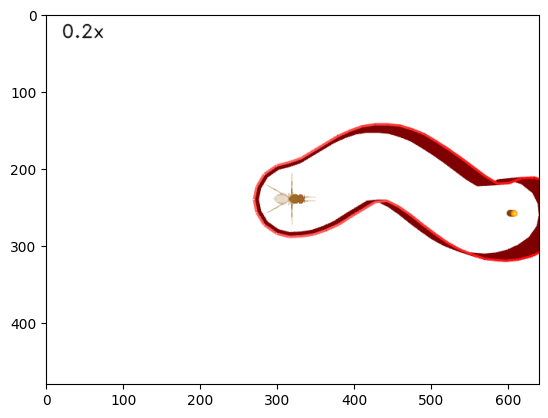

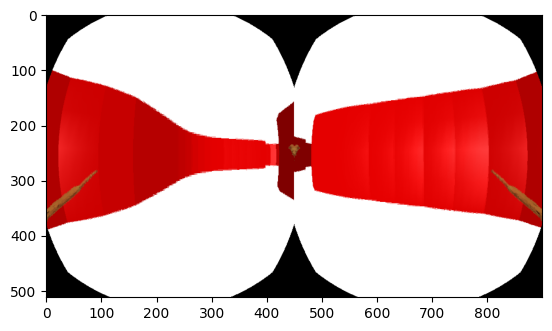

In [2]:
fly = Fly(render_raw_vision=True, enable_vision=True)
arena = Corridor()
cam = Camera(
    attachment_point=fly.model.worldbody,
    camera_name="camera_top_zoomout",
)
sim = SingleFlySimulation(
    fly=fly,
    arena=arena,
    cameras=[cam],
)
obs, info = sim.reset(seed=0)
fig, ax = plt.subplots()
ax.imshow(sim.render()[0])
fig, ax = plt.subplots()
ax.imshow(np.concatenate(info["raw_vision"], axis=1) / 255)

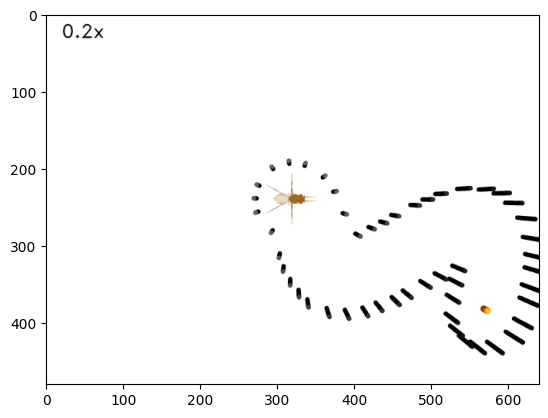

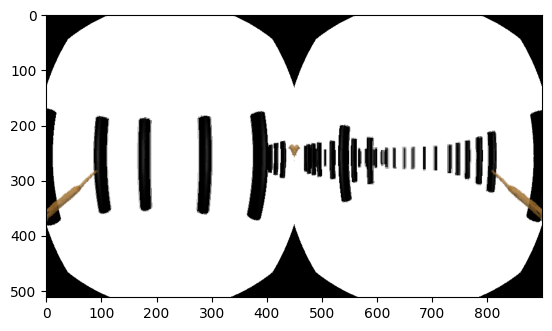

In [3]:
fly = Fly(render_raw_vision=True, enable_vision=True)
arena = CorridorWithPillars(thick=0.5)
cam = Camera(
    attachment_point=fly.model.worldbody,
    camera_name="camera_top_zoomout",
)
sim = SingleFlySimulation(
    fly=fly,
    arena=arena,
    cameras=[cam],
)
obs, info = sim.reset(seed=0)
fig, ax = plt.subplots()
ax.imshow(sim.render()[0])
fig, ax = plt.subplots()
ax.imshow(np.concatenate(info["raw_vision"], axis=1) / 255)